package 'dcurves' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fsyan\AppData\Local\Temp\Rtmp8ygewx\downloaded_packages
package 'survival' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'survival'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Program Files\R\R-4.4.2\library\00LOCK\survival\libs\x64\survival.dll to C:\Program Files\R\R-4.4.2\library\survival\libs\x64\survival.dll: Permission denied"
Warning message:
"restored 'survival'"



The downloaded binary packages are in
	C:\Users\fsyan\AppData\Local\Temp\Rtmp8ygewx\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fsyan\AppData\Local\Temp\Rtmp8ygewx\downloaded_packages


[1] 750   9

tibble [750 × 9] (S3: tbl_df/tbl/data.frame)
 $ patientid       : num [1:750] 1 2 3 4 5 6 7 8 9 10 ...
 $ cancer          : logi [1:750] FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ ttcancer        : num [1:750] 3.009 0.249 1.59 3.457 3.329 ...
 $ risk_group      : chr [1:750] "low" "high" "low" "low" ...
 $ age             : num [1:750] 64 78.5 64.1 58.5 64 ...
 $ famhistory      : num [1:750] 0 0 0 0 0 0 0 0 0 0 ...
 $ marker          : num [1:750] 0.7763 0.2671 0.1696 0.024 0.0709 ...
 $ cancerpredmarker: num [1:750] 0.0372 0.57891 0.02155 0.00391 0.01879 ...
 $ cancer_cr       : Factor w/ 3 levels "censor","diagnosed with cancer",..: 1 1 1 1 1 1 1 2 1 1 ...


Warning message:
"Removed 15 rows containing non-finite outside the scale range (`stat_smooth()`)."


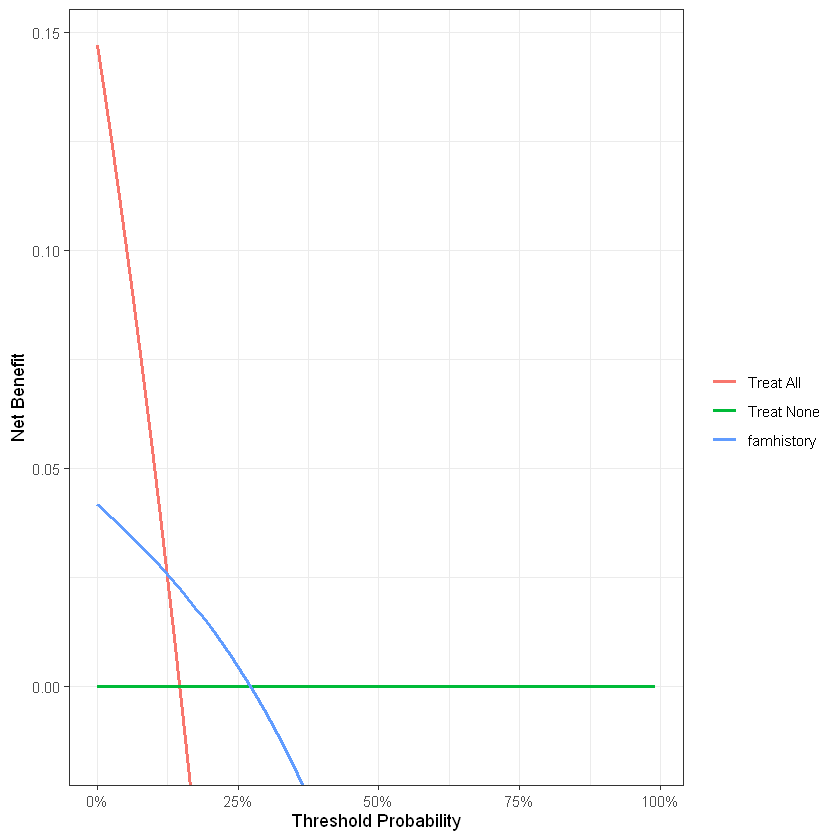

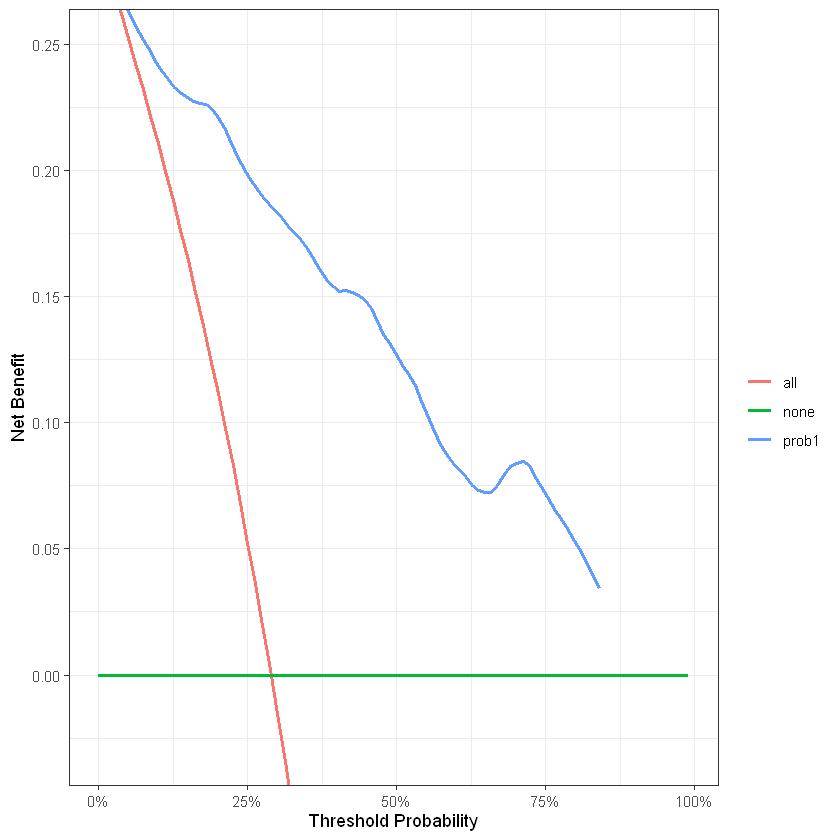

In [1]:
##安装
install.packages("dcurves")
install.packages("survival")
install.packages("ggplot2")
library(dcurves)
library(survival)
library(ggplot2)
data("df_surv")

# 查看数据结构
dim(df_surv)
str(df_surv)

##ggplot2 ##ttcancer为时间，cancer为事件发生
dcurves::dca(Surv(ttcancer, cancer) ~ famhistory,
             data = df_surv,
             time = 1 # 时间选1年
             ) %>% 
  plot(smooth = T)

##MultiCox
cox_model <- coxph(Surv(ttcancer, cancer) ~ age + famhistory + marker, data = df_surv)
# 计算2年的概率
df_surv$prob1 <- c(1-(summary(survfit(cox_model, newdata=df_surv), times=2)$surv))
# 我们分2步，先获取数据，再用ggplot2画图
x1 <- dcurves::dca(Surv(ttcancer, cancer) ~ prob1,
    data = df_surv,
    time = 2
    )%>% 
  dcurves::as_tibble()
##画图
ggplot(x1, aes(x=threshold, y=net_benefit,color=variable))+
  stat_smooth(method = "loess", se = FALSE, formula = "y ~ x", span = 0.2) +
  coord_cartesian(ylim = c(-0.03, 0.25)) +
  scale_x_continuous(labels = scales::label_percent(accuracy = 1)) +
  labs(x = "Threshold Probability", y = "Net Benefit", color = "") +
  theme_bw()
